In [1]:
import pandas as pd
import numpy as np
from Processing import missing_values
from Processing import outliers_detection
from Processing import Feature_Selection

In [2]:
df = pd.read_excel('dataset.xlsx')
print('shape of : ', df.shape)
df.head()

shape of :  (5644, 111)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Brief describtion
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


## Section 1 : Missing Values

In [4]:
# declaration of missing value object
ms = missing_values(df)

In [5]:
# columns with missing values : 
cnt = 0
for col in df.columns.to_list() :
    if ms.check_missing()['total missing'][col] != 0 :
        cnt += 1
print('Number of columns with missing values : ', cnt)
ms.check_missing()

Number of columns with missing values :  105


,total missing,proportion
Patient ID,0,0.000000
Patient age quantile,0,0.000000
SARS-Cov-2 exam result,0,0.000000
"Patient addmited to regular ward (1=yes, 0=no)",0,0.000000
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0,0.000000
...,...,...
HCO3 (arterial blood gas analysis),5617,0.995216
pO2 (arterial blood gas analysis),5617,0.995216
Arteiral Fio2,5624,0.996456
Phosphor,5624,0.996456


If we drop the columns

In [6]:
# Printing the number of columns that have a rate = 0 %
print('Number of cols after droping : ',ms.drop_missing(axis = 1).shape[1])
# 111 - 105 = 6

Number of cols after droping :  6


If we drop the Rows

In [7]:
# Printing the number of Rows that have no missing samples
print('Number of Rows after droping : ',ms.drop_missing(axis = 0).shape[0])

Number of Rows after droping :  0


### Indexing and Imputation

Indexing Samples with missing value related to each column

In [8]:
# For Example we will take the list of columns that have a rate of missing values >= 95%
col_ms_list = []
for col in df.columns.to_list() :
    if ms.check_missing()['proportion'][col] >= 0.95 :
        col_ms_list.append(col)
print('Number of cols with a rate > 0.95 : ', len(col_ms_list)) # 65 cols with a rate > 95% 

ms.add_var_denote_NA(NA_col=col_ms_list) # if an observation is missing for a col > 1, otherwise > 0


Number of cols with a rate > 0.95 :  65


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases)_is_NA,pCO2 (arterial blood gas analysis)_is_NA,Base excess (arterial blood gas analysis)_is_NA,pH (arterial blood gas analysis)_is_NA,Total CO2 (arterial blood gas analysis)_is_NA,HCO3 (arterial blood gas analysis)_is_NA,pO2 (arterial blood gas analysis)_is_NA,Arteiral Fio2_is_NA,Phosphor_is_NA,ctO2 (arterial blood gas analysis)_is_NA
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,1,1,1,1,1,1,1,1,1,1
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1


In [9]:
# try the last method with a variable without missing observations
col = ["Patient ID"] # Remember to convert it to a list even if it has len equal 1
ms.add_var_denote_NA(NA_col = col) # warn check, it's a waste of time if we put an index to each observation

C:\Users\pc\Desktop\MyThings\Coding\AI\Into-the-wild-of-Data-Science\OOP\Processing.py:62: UserWarning: Column 'Patient ID' has no missing cases
  warn("Column '%s' has no missing cases" % i)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Imputation

In [10]:
# using the same list col_ms_list
# we will choose the columns form col_ms_list that are numerical and remove others
ls_number = df.select_dtypes(include=np.number).columns
for element in col_ms_list:
         if (element in ls_number) != True :
              col_ms_list.remove(element)
len(col_ms_list) # previous : 65, now : 57
# we're sure that all cols are numerical
value = 999
ms.impute_NA_with_arbitrary(impute_value = value, NA_col = col_ms_list)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases)_999,pCO2 (arterial blood gas analysis)_999,Base excess (arterial blood gas analysis)_999,pH (arterial blood gas analysis)_999,Total CO2 (arterial blood gas analysis)_999,HCO3 (arterial blood gas analysis)_999,pO2 (arterial blood gas analysis)_999,Arteiral Fio2_999,Phosphor_999,ctO2 (arterial blood gas analysis)_999
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0


In [11]:
# Replace the missing values with average of an aggregation function
# mean, median, mode(categorical)
# but before we won't use col_ms_list because it contained a lot of missing values and using this technic it's not meaningful.
# for this reason We will create new list that contined cols with a rate of missing value >= 0.8 and < 0.9
# For Example we will take the list of columns that have a rate of missing values >= 95%
col_ms_list_new = []
for col in df.columns.to_list() :
    prop = ms.check_missing()['proportion'][col]
    if prop >= 0.8 and prop < 0.9 and (col in ls_number):
        col_ms_list_new.append(col)
print('Number of cols with a rate between 0.8 and 0.9 : ', len(col_ms_list_new)) # 14 cols

ms.impute_NA_with_avg(NA_col = list(col_ms_list_new))

Number of cols with a rate between 0.8 and 0.9 :  14


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Red blood Cells_impute_mean,Lymphocytes_impute_mean,Mean corpuscular hemoglobin concentration (MCHC)_impute_mean,Leukocytes_impute_mean,Basophils_impute_mean,Mean corpuscular hemoglobin (MCH)_impute_mean,Eosinophils_impute_mean,Mean corpuscular volume (MCV)_impute_mean,Monocytes_impute_mean,Red blood cell distribution width (RDW)_impute_mean
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,-2.237665e-01,-2.922693e-01,1.482158e+00,1.661924e-01,3.575467e-01,-6.250727e-01
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08


Here I did get an error wasting me a lot of time : <br>
problem : 
> unsupported operand type(s) for +: 'int' and 'str'
<br>
Reason : Sum (mean, median)

In [12]:
# Replace the missing values with End of distribution value
# Calculated as z-score of each column : mean + 3 sigma

ms.impute_NA_with_end_of_distribution(NA_col=col_ms_list_new)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Red blood Cells_impute_end_of_dist,Lymphocytes_impute_end_of_dist,Mean corpuscular hemoglobin concentration (MCHC)_impute_end_of_dist,Leukocytes_impute_end_of_dist,Basophils_impute_end_of_dist,Mean corpuscular hemoglobin (MCH)_impute_end_of_dist,Eosinophils_impute_end_of_dist,Mean corpuscular volume (MCV)_impute_end_of_dist,Monocytes_impute_end_of_dist,Red blood cell distribution width (RDW)_impute_end_of_dist
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002499,3.002495
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002499,3.002495
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002499,3.002495
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002499,3.002495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002499,3.002495
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002499,3.002495
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002499,3.002495
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002495,3.002499,3.002495


In [13]:
# Imputing Missing values with random collection from the existing samples [shuffle it with random_state]
# use replace True to get more samples if u have less than what you need ~ Nu(missing values) > Nu(Not missing)

ms.impute_NA_with_random(NA_col=col_ms_list_new, replace=True, random_state=0)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Red blood Cells_random,Lymphocytes_random,Mean corpuscular hemoglobin concentration (MCHC)_random,Leukocytes_random,Basophils_random,Mean corpuscular hemoglobin (MCH)_random,Eosinophils_random,Mean corpuscular volume (MCV)_random,Monocytes_random,Red blood cell distribution width (RDW)_random
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,0.137265,0.761876,-0.552476,2.217890,-0.834685,-2.069504,-0.076999,-2.077119,-0.272770,-0.625073
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,1.124565,-0.005738,0.542882,0.116882,0.692611,-0.344541,3.715545,-0.675050,-0.351560,-0.182790
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,1.071674,0.906870,0.343725,-0.745784,0.081693,-0.292269,1.060764,-0.474754,1.933339,-0.182790
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,0.701437,-0.261609,1.040773,0.000005,0.387152,0.439533,0.049419,-0.014074,-0.509139,-0.094334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,-1.713922,-0.014267,-1.149948,-1.789331,11.078219,0.700891,0.007280,1.408024,0.646442,3.355468
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,-0.409276,-1.378914,1.936978,0.038964,-0.529226,0.805435,-0.835508,-0.034103,0.804021,-1.244268
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,-1.255533,0.437772,1.439088,2.490604,-1.140144,3.575830,-0.835508,3.150596,0.882811,2.736274
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,0.366460,0.813050,-0.054585,-0.325582,0.692611,0.230447,0.133698,0.286369,-1.008140,-0.978899


So, Before moving to the next step 'Outliers detection and correction' <br>
We need first to Fill or delete missing samples from a copy of our dataFrame

#### Steps :
1. Create 2 lists for cat and num variables.
2. fill or delete the missing values with a propor technic.
3. Explore the results.

In [14]:
# create copy of df
df_c = df.copy(deep=True)
ms = missing_values(df_c)
# step 1
ls_number = list(df.select_dtypes(include=np.number).columns)
ls_cat = list(df.select_dtypes(exclude=np.number).columns)
print('dim of cols : ', len(ls_cat)+len(ls_number)) # Verification

# 2 types, droped_cols and filled_cols
ls_droped = []
ls_number_filled = []
ls_cat_filled = []

for col in df.columns.to_list() :
    if ms.check_missing()['proportion'][col] >= 0.9 :
        ls_droped.append(col)
    elif ms.check_missing()['proportion'][col] > 0:
        if col in ls_number :
            ls_number_filled.append(col)
        else : ls_cat_filled.append(col)

# step 2
# droping cols with higher rate of missing values
# filling missing values in numerical cols with random sample
# ... and for categorical cols with mode
df_c = df_c.drop(ls_droped, axis=1)
ms = missing_values(df_c)
df_c = ms.impute_NA_with_avg(NA_col=ls_number_filled)
ms = missing_values(df_c)
df_c = ms.impute_NA_with_avg(NA_col=ls_cat_filled, strategy='mode')

# step 3

df_c = df_c.drop(ls_number_filled + ls_cat_filled, axis=1)
df_c

dim of cols :  111


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit_impute_mean,Hemoglobin_impute_mean,Platelets_impute_mean,Mean platelet volume _impute_mean,...,Adenovirus_impute_mode,Parainfluenza 4_impute_mode,Coronavirus229E_impute_mode,CoronavirusOC43_impute_mode,Inf A H1N1 2009_impute_mode,Bordetella pertussis_impute_mode,Metapneumovirus_impute_mode,Parainfluenza 2_impute_mode,"Influenza B, rapid test_impute_mode","Influenza A, rapid test_impute_mode"
0,44477f75e8169d2,13,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
1,126e9dd13932f68,17,negative,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
3,f7d619a94f97c45,5,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
4,d9e41465789c2b5,15,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
5640,517c2834024f3ea,17,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
5641,5c57d6037fe266d,4,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
5642,c20c44766f28291,10,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative


Cheking the missing value count

In [15]:
cnt = 0
j = 0
for i in df_c.columns.to_list():
    if df_c.isnull().sum()[j] > 0 :
        cnt += df_c.isnull().sum()[j]
    j += 1

cnt # DONE 0 ()

0

In [22]:
df_c

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit_impute_mean,Hemoglobin_impute_mean,Platelets_impute_mean,Mean platelet volume _impute_mean,...,Adenovirus_impute_mode,Parainfluenza 4_impute_mode,Coronavirus229E_impute_mode,CoronavirusOC43_impute_mode,Inf A H1N1 2009_impute_mode,Bordetella pertussis_impute_mode,Metapneumovirus_impute_mode,Parainfluenza 2_impute_mode,"Influenza B, rapid test_impute_mode","Influenza A, rapid test_impute_mode"
0,44477f75e8169d2,13,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
1,126e9dd13932f68,17,negative,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
3,f7d619a94f97c45,5,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
4,d9e41465789c2b5,15,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
5640,517c2834024f3ea,17,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
5641,5c57d6037fe266d,4,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
5642,c20c44766f28291,10,negative,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative


In [21]:
df_c.loc[df_c["SARS-Cov-2 exam result"].isnull() == True]

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit_impute_mean,Hemoglobin_impute_mean,Platelets_impute_mean,Mean platelet volume _impute_mean,...,Adenovirus_impute_mode,Parainfluenza 4_impute_mode,Coronavirus229E_impute_mode,CoronavirusOC43_impute_mode,Inf A H1N1 2009_impute_mode,Bordetella pertussis_impute_mode,Metapneumovirus_impute_mode,Parainfluenza 2_impute_mode,"Influenza B, rapid test_impute_mode","Influenza A, rapid test_impute_mode"


## Section 2 : Outliers detection

<h4 style = "color : darkorange; padding : 0; margin : 0;">Detection</h4>

In [19]:
# in this section we will be working with df_c as dataFrame
# First technic is detection with specified range based on each cols, so we need first 
# ... have an idea about the range of each column variation
# We will take col : "Patient age quantile" this col must have an intevale of variation between 2 and 90 ['ages of patients'] (just an example)
od = outliers_detection(df_c)
col_name_example = "Patient age quantile"
# let's calculate the number and propotion of samples that's not exist in this interval
_= od.outlier_detect_arbitrary(col_name_example, upper_fence=90, lower_fence=2)

# it's useful when you know ur data very well, as special variation ..ect.

Num of outlier detected: 568
Proportion of outlier detected 0.10063784549964565


In [20]:
# we can get best detection with IQR [check processing for more infos and docs]
col_name_example = 'Hematocrit_impute_mean'
_ = od.outlier_detect_IQR(col_name = col_name_example)

Num of outlier detected: 603
Proportion of outlier detected 0.10683912119064494


In [21]:
# we can get also a good detection with z-score technic [check processing for more infos and docs]
_ = od.outlier_detect_mean_std(col_name=col_name_example)

Num of outlier detected: 173
Proportion of outlier detected 0.03065201984408221


In [22]:
# we can use also MAD technic that is better than smean and standard deviation method detection [check processing for more infos and docs]
_ = od.outlier_detect_MAD(col_name="Platelets_impute_mean", threshold = 3.5)

Num of outlier detected: 602
Proportion of outlier detected 0.10666194188518781


C:\Users\pc\Desktop\MyThings\Coding\AI\Into-the-wild-of-Data-Science\OOP\Processing.py:217: RuntimeWarning: invalid value encountered in double_scalars
  modified_z_scores = pd.Series([0.67449 * (y - median) / median_absolute_deviation for y in self.df[col_name]])
C:\Users\pc\Desktop\MyThings\Coding\AI\Into-the-wild-of-Data-Science\OOP\Processing.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  modified_z_scores = pd.Series([0.67449 * (y - median) / median_absolute_deviation for y in self.df[col_name]])


## Section 3 : Feature selection

In [42]:
# in this section we will be working with df_c as dataFrame

fs = Feature_Selection(df_c)

Visualizing if we have categorical variables or not.

<AxesSubplot:>

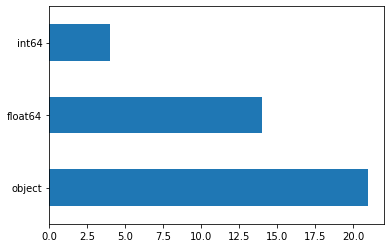

In [43]:
df_c.dtypes.value_counts().plot(kind = 'barh')

In [44]:
# we need to encode all the target categorical variables other ways it not gonna work with our feature selection methods
"""
Note that you should do the same thing for all the categorical variables.
This depends on your dataset.
"""

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

label_encoded_df = df_c.copy(deep=True)
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])
#     label_encoded_df[col] = le.fit_transform(np.array(y)) # label encoder doesn't accept dataframes some times
    label_encoded_df[col] = le.fit_transform(label_encoded_df[col])
    
    label_encoded_df[col] = pd.DataFrame(label_encoded_df[col], columns = [col]) # after encoding our target value we will conver it to dataframe again

<AxesSubplot:>

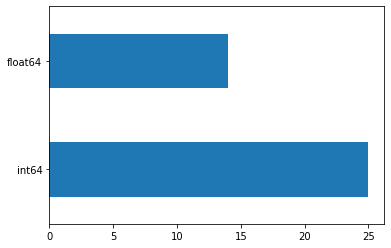

In [45]:
label_encoded_df.dtypes.value_counts().plot(kind = 'barh')

In [46]:
label_encoded_df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit_impute_mean,Hemoglobin_impute_mean,Platelets_impute_mean,Mean platelet volume _impute_mean,...,Adenovirus_impute_mode,Parainfluenza 4_impute_mode,Coronavirus229E_impute_mode,CoronavirusOC43_impute_mode,Inf A H1N1 2009_impute_mode,Bordetella pertussis_impute_mode,Metapneumovirus_impute_mode,Parainfluenza 2_impute_mode,"Influenza B, rapid test_impute_mode","Influenza A, rapid test_impute_mode"
0,1588,13,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,1,1,1,1,1,1,1,0,0,0
1,451,17,0,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,...,1,1,1,1,1,1,1,0,0,0
2,3669,8,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,1,1,1,1,1,1,1,0,0,0
3,5457,5,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,1,1,1,1,1,1,1,0,0,0
4,4843,15,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3892,3,1,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,1,1,1,1,1,1,1,0,0,0
5640,1860,17,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,1,1,1,1,1,1,1,0,0,0
5641,2125,4,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,1,1,1,1,1,1,1,0,0,0
5642,4316,10,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,1,1,1,1,1,1,1,0,0,0


In [47]:
# we will first separate our target value from other features

X = label_encoded_df.drop(columns = ["SARS-Cov-2 exam result"], axis = 0)
y = label_encoded_df["SARS-Cov-2 exam result"]

<h4 style = "color : darkorange; padding : 0; margin : 0;">Embedded methods</h4>

##### Random forest classifier

In [67]:
# we will start by testing bu random forest classifier ()

feature_rank_rf = fs.rf_importance(X_train=X, y_train=y, max_depth = 10, class_weight = None, n_estimators = 50, random_state = 0)
feature_rank_rf

,indice,feature,importances
id,,,
1,1,Patient age quantile,0.126868
2,12,Leukocytes_impute_mean,0.124723
3,2,"Patient addmited to regular ward (1=yes, 0=no)",0.081450
4,7,Platelets_impute_mean,0.078737
5,0,Patient ID,0.073931
6,17,Monocytes_impute_mean,0.065476
7,15,Eosinophils_impute_mean,0.051576
8,9,Red blood Cells_impute_mean,0.048890
9,10,Lymphocytes_impute_mean,0.042583


for exemple if we want to choose the 80% with more importance :

In [68]:
# here we will calculet how many variable that satisfy the condition (sum imprtance = 0.8)


rate = 0
j = 0
for i in feature_rank_rf["importances"]:
    if(rate < 0.8):
        rate += i
    else:
        break
    j += 1


print("The final rate : ",rate)
print("The number of features : ",j)

The final rate :  0.8088613125334707
The number of features :  12


In [69]:
"""
in feature_rank the varibles are sorted from the most importan to the less 
so wi will select the variables from the most important to the last but we 
will stop when we get the number of variables that we want
""" 

k = 0
final_list = []
for i in feature_rank_rf["feature"]:
    if k < j:
        final_list.append(i)
    k += 1

print("The final features list :")
final_list

The final features list :


['Patient age quantile',
 'Leukocytes_impute_mean',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Platelets_impute_mean',
 'Patient ID',
 'Monocytes_impute_mean',
 'Eosinophils_impute_mean',
 'Red blood Cells_impute_mean',
 'Lymphocytes_impute_mean',
 'Hematocrit_impute_mean',
 'Hemoglobin_impute_mean',
 'Mean corpuscular volume (MCV)_impute_mean']

Gradient Boosting Classifier